<a href="https://colab.research.google.com/github/VedantSonawane19/ML_code/blob/main/Customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# load the data
df = pd.read_csv('/content/marketing_campaign (1).csv', sep='\t')

In [ ]:
# getting numbers of rows and columns
print(df.shape)

(2240, 1)


In [ ]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [ ]:
# Drop columns not useful for clustering
df = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Handle missing values
df = df.dropna()

In [ ]:
print(df.shape)

(2216, 26)


In [ ]:
# Encode categorical columns

le = LabelEncoder()
df.loc[:, 'Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [ ]:
# Select relevant features

selected_features = [
    'Income', 'Education', 'Marital_Status',
    'Recency',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
    'Response'
]

X = df[selected_features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

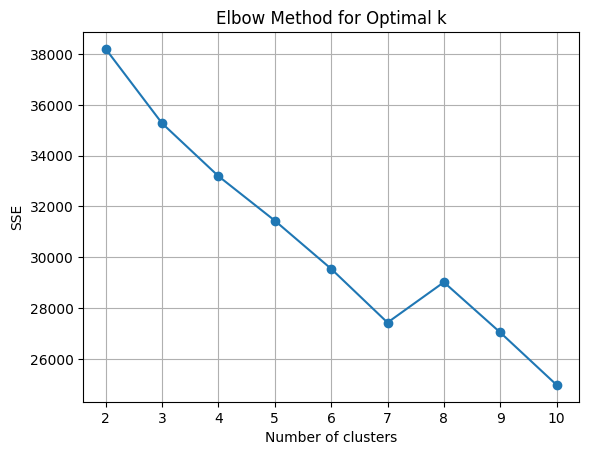

In [ ]:
# Elbow method
sse = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# Apply KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Group by cluster and analyze

cluster_summary = df.groupby('Cluster')[selected_features].mean()
print(cluster_summary)

               Income  Education  Marital_Status    Recency  NumWebPurchases  \
Cluster                                                                        
0        35065.294118   2.260366        3.725169  49.231437         2.115718   
1        77576.635611   2.275362        3.790890  49.915114         5.163561   
2        57815.343066   2.662409        3.667883  47.645985         6.375912   
3        69357.270270   2.722973        3.736486  49.594595         5.885135   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Cluster                                                              
0                   0.546770           3.219865           6.433944   
1                   6.161491           8.387164           2.720497   
2                   3.197080           7.806569           5.543796   
3                   4.216216           8.020270           5.155405   

           MntWines  MntFruits  ...  NumDealsPurchases  AcceptedCmp3  \
Cluster                   

**Q. Why is it important to scale features before clustering?**

Scaling ensures all features contribute equally to clustering, leading to more accurate and meaningful groupings.

**Q.Which scaling method would you use and why?**

StandardScaler is a data transformation technique provided by sklearn.preprocessing that standardizes features by removing the mean and scaling to unit variance.

In [ ]:
# Silhouette Score
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f'k={k} -> Silhouette Score: {score:.3f}')

k=2 -> Silhouette Score: 0.271
k=3 -> Silhouette Score: 0.184
k=4 -> Silhouette Score: 0.178
k=5 -> Silhouette Score: 0.184
k=6 -> Silhouette Score: 0.195
k=7 -> Silhouette Score: 0.203
k=8 -> Silhouette Score: 0.090
k=9 -> Silhouette Score: 0.099
k=10 -> Silhouette Score: 0.104


In [ ]:
# Final Clustering
final_k = 4
kmeans = KMeans(n_clusters=final_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Cluster Profiling
cluster_profile = df.groupby('Cluster')[['Income', 'Complain', 'NumWebVisitsMonth']].mean()
print("\nCluster Summary:\n", cluster_profile)


Cluster Summary:
                Income  Complain  NumWebVisitsMonth
Cluster                                           
0        35065.294118  0.011572           6.433944
1        77576.635611  0.006211           2.720497
2        57815.343066  0.010949           5.543796
3        69357.270270  0.000000           5.155405


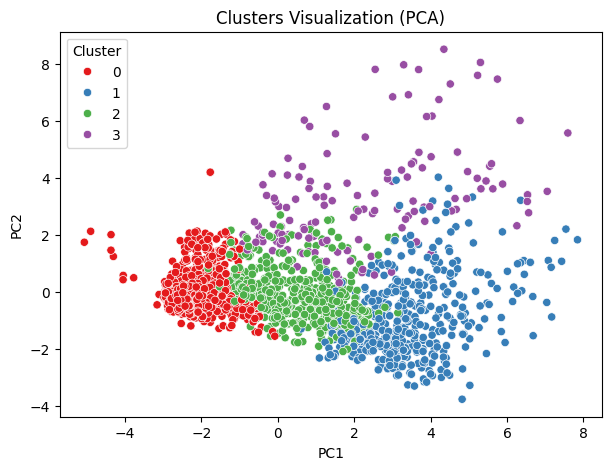

In [ ]:
# Visualize Clusters (PCA-reduced)
plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Cluster'], palette='Set1')
plt.title("Clusters Visualization (PCA)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Apply PCA for Visualization
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(X_scaled)